<a href="https://colab.research.google.com/github/pauline-johnson/machine-learning/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 Logistical Regression


### Import Statements for all problems

In [0]:
import numpy as np
import pandas as pd
import random as ra
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Problem 1 

In problem 1, we generate and display random data for logical regression with two features and a class label.

In [0]:
def get_random_data(w, b, mu, sigma, m): 
  
  x1_data = np.empty(m)
  x2_data = np.empty(m)
  label_data = np.empty(m)

  for i in range(0, m):

    # Generate class label c.
    rand = ra.random()
    c = 0 if rand <= 0.5 else 1

    # Generate feature x_1 with uniform distribution.
    x_1 = np.random.uniform(0,1)

    # Generate feature x_2 with normal distribution.
    n = np.random.default_rng().normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n

    label_data[i] = c
    x1_data[i] = x_1
    x2_data[i] = x_2

  data = pd.DataFrame()
  labels = pd.DataFrame()

  labels.insert(0, 'c', pd.Series(label_data))
  data.insert(0, 'x_1', pd.Series(x1_data))
  data.insert(1, 'x_2', pd.Series(x2_data))

  return data, labels

Using the data randomly generated above, display_random_data graphs a scatterplot of the data points, where the data corresponding to a label of 1 are red and a label of 0 are blue.

In [0]:
def display_random_data(data, labels):
  df = pd.concat([labels, data], axis=1)
  df.columns = ['c', 'x_1', 'x_2']
  scatter = sns.scatterplot(data=df, x='x_1', y='x_2', hue='c', palette=["b", "r"])
  scatter.plot()
  return scatter

Here we call the functions and split the data into a training and test set for future use. 

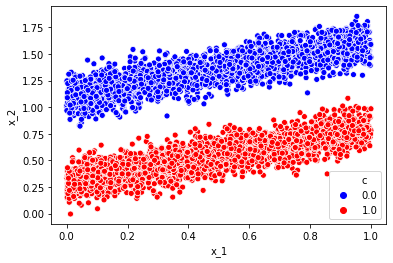

In [0]:
# Generate random data.
m = 5000
w, b = .5, .7
mu = .4
sigma = .1

data, labels = get_random_data(w, b, mu, sigma, m)

# Display random data.
display_random_data(data, labels)

# Split data and labels into training and test sets (~80% training and 
# 20% testing data).
training_size = (int)(0.8 * m)

training_data = data.to_numpy()[:training_size]
test_data = data.to_numpy()[training_size:]

training_labels = labels.to_numpy()[:training_size]
test_labels = labels.to_numpy()[training_size:]

# Problem 2

Using the randomly generated data from above, create a Keras to implement logical regression.
 

## Create Model
The Sequential model is a linear stack of layers.
 We will add a Dense layer that accepts two-dimensional input
 with two rows and output with one row.


In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))

## Configure learning process

Now we configure the learning process.
There are two required parameters, a loss function and an optimizer. 

Loss functions evaluate how well the model models your dataset.
We use the default binary cross-entropy.

Optimizers tie together loss function and model parameters by updating the model in response to loss function's output. We use stochastic gradient descent which uses random batches for this process.

We train model for 1000 epochs, or iterations on a dataset. As you can see the loss goes down every epoch.


In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd',
              metrics=['accuracy'])

model.fit(training_data, training_labels, epochs=200, batch_size=500,verbose=1)

Epoch 1/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.6973
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7315
Epoch 3/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7595
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7772
Epoch 5/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7980
Epoch 6/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8158
Epoch 7/200
8/8 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8338
Epoch 8/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8528
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8673
Epoch 10/200
8/8 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8860
Epoch 11/200
8/8 [===========

## Weight and bias

In [0]:
weights, bias = model.layers[0].get_weights()
x_1_weight, x_2_weight = weights
x_1_weight, x_2_weight, bias

(array([0.8796571], dtype=float32),
 array([-1.7377418], dtype=float32),
 array([1.6925851], dtype=float32))

## Loss and Accuracy

In [0]:
loss, accuracy = model.evaluate(test_data, test_labels)
loss, accuracy

32/32 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 1.0000


(0.015106621198356152, 1.0)

## Scatterplot
Here is a scatterplot of the data. The green line is the true line used to generate the data. The yellow line is the separating line of the trained model. This line is found by converting `w1 * x1 + w2 * x2 + b = 0` to `x_2 = -(w1 * x1 + b) / w2`.

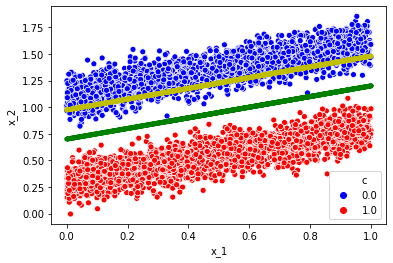

In [0]:
scatter = display_random_data(data, labels)
x_1 = data['x_1']

# Line used to generate data.
scatter.plot(x_1, w * x_1 + b, color='g', linewidth=5)

# Separating line of trained model.
x_2 = -1 * ((x_1_weight * x_1) + bias) / x_2_weight
scatter.plot(x_1, x_2, color='y', linewidth=5)

## Heatmap





###heatmap function

In [0]:
def heatmap(weights, bias, data):
  # mapping x and y values to data from df
  x_1_seq = np.linspace(data['x_1'].min(), data['x_1'].max(), 100)
  x_2_seq = np.linspace(data['x_2'].min(), data['x_2'].max(), 100)
                         
  x, y = np.meshgrid(x_1_seq, x_2_seq)
  
  z = bias + y * weights[1] + x * weights[0]
  z = z[:-1, :-1]
  maxz, minz = np.abs(z).max(), -1*np.abs(z).max()

  hm, axis = plt.subplots()
  c = axis.pcolormesh(x, y, z, vmin=minz, vmax=maxz, cmap='PiYG')
  axis.axis([x.min(), x.max(), y.min(), y.max()])
  hm.colorbar(c, ax=axis)

This heatmap helps us visualize the function represented by `x_2 = -(w1 * x1 + b) / w2` i.e. the yellow line.

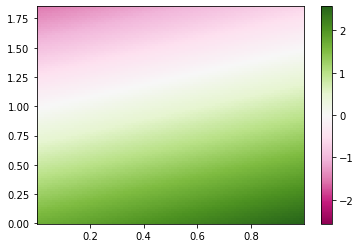

In [0]:
heatmap(weights, bias, data)

# Problem 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.



## Logistical Regression model

This linear regression model was adapted from Andrew Ng’s Machine Learning Course in Python (source 3).





In [0]:
training_size = (int)(0.8 * m)

training_data = data.to_numpy()[:training_size]
test_data = data.to_numpy()[training_size:]

training_labels = labels.to_numpy()[:training_size]
test_labels = labels.to_numpy()[training_size:]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the loss function and gradient
def calc_loss(weights, data, labels):
    m = len(labels)
    predictions = sigmoid(np.dot(data,weights))
    error = (-labels * np.log(predictions)) - ((1-labels)*np.log(1-predictions))
    loss = 1 / m * sum(error)
    grad = 1 / m * np.dot(data.transpose(),(predictions - labels))
    return loss[0],grad

def sgd(data, labels, lr, epochs):    
  m = len(labels)
  w = np.zeros((data[0].size, 1))
  for i in range(epochs):
      loss = calc_loss(w, data, labels)[0]
      grad = calc_loss(w, data, labels)[1]
      w = w - (lr * grad)
  return w, loss

training_data = np.append(np.ones((training_data.shape[0],1)), training_data, axis=1)
weights, loss = sgd(training_data,training_labels,1,1000)
weights = weights[1:]
bias = weights[0]

In [0]:
weights, bias

(array([[  6.41642791],
        [-11.19267159]]), array([6.41642791]))

## Generate Graph

Here is a scatterplot of the data. The green line is the true line used to generate the data. The yellow line is the separating line of the trained model.

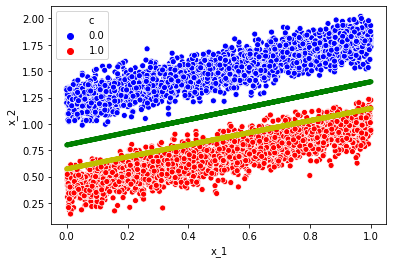

In [0]:
scatter = display_random_data(data, labels)
x_1 = data['x_1']

# Line used to generate data.
scatter.plot(x_1, w * x_1 + b, color='g', linewidth=5)

# Trained model.
x_2 = -1*((weights[0]*x_1)+bias)/weights[1]
scatter.plot(x_1, x_2, color='y', linewidth=5)

## Heatmap

Helps us visualize function generated by trained model.

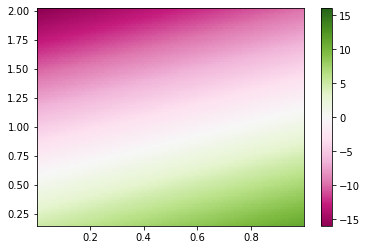

In [0]:
heatmap(weights, bias, data)

##Binary cross entropy loss and accuracy

In [0]:
def guess(data, w, b):
  return w[0] * data[-2] + w[1] * data[-1] + b

def accuracy(w, b, data, labels):
  num_correct = 0
  for row in range(data.shape[0]):
    label_guess = sigmoid(guess(data[row], w, b))
    guessed_right = (label_guess > 0.5) == labels[row]
    num_correct += 1 if (guessed_right) else 0
  return num_correct / data.shape[0]

accuracy(weights, bias, training_data, training_labels), loss

(0.9725, 0.020504311876924138)

# Sources

1. https://keras.io/getting-started/sequential-model-guide/
https://algorithmia.com/blog/introduction-to-optimizers

2. https://keras.io/models/about-keras-models/
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

3. https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb